# Mouse disease phase detection program using CNN with Keras api

## Training Phase

(1) 사용할 패키지 불러오기

In [18]:
import numpy as np
import keras
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.vis_utils import plot_model
from keras.models import load_model
from keras.utils import np_utils

(2) 데이터 셋 불러오기 & 생성하기

In [66]:
# 훈련셋과 시험셋 불러오기
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
#x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0
# 훈련셋과 검증셋 분리 #분리 기점 test 할것 할당 50000 이렇게.
#x_val = x_train[50000:]
#y_val = y_train[50000:]
#x_train = x_train[:50000]
#y_train = y_train[:50000]

# Multi. 데이터셋 생성하기
# 데이터셋 전처리 : one-hot 인코딩
#y_train = np_utils.to_categorical(y_train)
#y_val = np_utils.to_categorical(y_val)
#y_test = np_utils.to_categorical(y_test)

# Binary1. 이터셋 생성하기
# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
#y_train = y_train % 2
#y_val = y_val % 2
#y_test = y_test % 2

np.random.seed(3)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 10,
                                   width_shift_range = 10,
                                   height_shift_range = 0.2,
                                   shear_range = 0.7,
                                   zoom_range = [0.9, 2.2],
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory('OpenFieldTest/Training',
                                                    target_size = (40,40), #픽셀 사이즈 선정 필요
                                                    batch_size = 3,
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory('OpenFieldTest/Validation',
                                                  target_size = (40,40), #픽셀 사이즈 선정 필요
                                                  batch_size = 3,
                                                  class_mode = 'categorical')

Found 54 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


(cf) 예측할 데이터 샘플 보이기

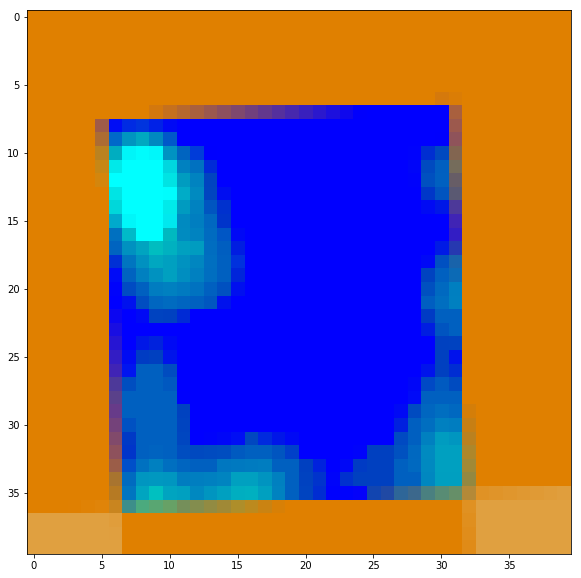

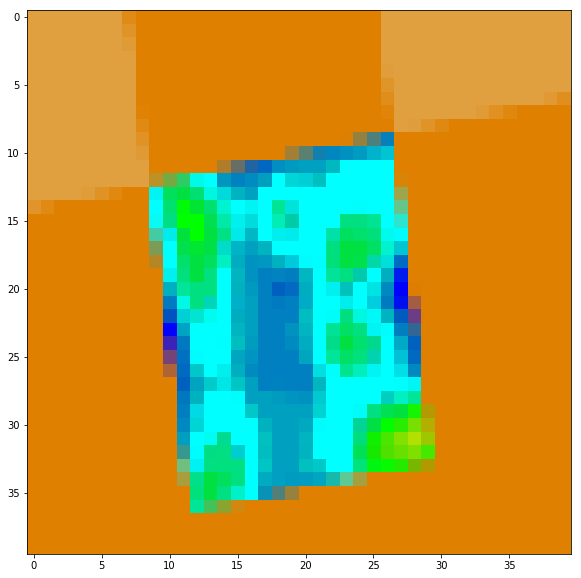

In [68]:
# Binary Sample Visualization
x_batch, y_batch = next(train_generator)

for i in range (0,2):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

import matplotlib.image as mpimg
img=mpimg.imread('OpenFieldTest/Training/WT/WT_1-0_Set2_Center_ctrl401.png')#데이터 입력
img.shape
imgplot = plt.imshow(img)

for i in range(5*5):
    sub_plt = axarr[int(i/x), int(i%5)]
    sub_plt.axis('off')




#plt_row = 3
#plt_col = 3

#plt.rcParams["figure.figsize"] = (10,10)

#f, axarr = plt.subplots(plt_row, plt_col)

#for i in range(plt_row*plt_col):
#    sub_plt = axarr[int(i/plt_row), int(i%plt_col)]
#    sub_plt.axis('off')
#    sub_plt.imshow(train_generator[i])

#plt.show()



# Multinary Sample Visualization
# %matplotlib inline
# import matplotlib.pyplot as plt

# plt_row = 5
# plt_col = 5

# plt.rcParams["figure.figsize"] = (10,10)

# f, axarr = plt.subplots(plt_row, plt_col)

# for i in range(plt_row*plt_col):

#    sub_plt = axarr[i/plt_row, i%plt_col]
#    sub_plt.axis('off')
#    sub_plt.imshow(x_test[i].reshape(width, height))
#    sub_plt_title = 'R: ' + str(np.argmax(y_test[i]))
#    sub_plt.set_title(sub_plt_title)

# plt.show()

# Put the image data any folder(label) you want.
# img=mpimg.imread ('ASAP/OpenFieldTest/Train/WT/001.jpg')#데이터 입력
# img.shape
# imgplot = plt.imshow(img)
# plt.colorbar()

# img2=mpimg.imread ('ASAP/OpenFieldTest/Train/5XFAD/001.jpg')#데이터 입력
# img.shape
# imgplot = plt.imshow(img2)
# plt.colorbar()

(3) 학습 모델 구성하기

In [22]:
# Multi2. 모델 구성하기
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax')) # 다중 분류시

# Binary2. 모델 구성하기
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid')) # 2진 분류시

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

(4) 모델 학습과정 설정하기

In [23]:
# Multinary 3. 모델 학습과정 설정하기
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Binary3. 모델 학습과정 설정하기
#model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

(5) 학습 모델 표시하기

In [24]:
plot_model(model, to_file='model.png', show_shapes =True, show_layer_names = True, rankdir = 'TB')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total para

(6) 모델 학습시키기

In [25]:
# Multinary,Binary4. 모델 학습시키기
#hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

class outputImages(keras.callbacks.Callback):
    def __init__(self, input_data):
        self.input_data = input_data
    
    def on_epoch_end(self, epoch, logs={}):
        if epoch % 10 == 0:
            get_model_layers_output_combined_image(self.model, self.input_data)
            
output_images = outputImages(keras.callbacks.Callback)
history = model.fit_generator(
        train_generator,
        steps_per_epoch=50,
        epochs=100,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/100
50/50 [==============================] - 1s 17ms/step - loss: 0.6951 - acc: 0.5467 - val_loss: 0.6316 - val_acc: 0.6667
Epoch 2/100
50/50 [==============================] - 1s 11ms/step - loss: 0.6518 - acc: 0.6733 - val_loss: 0.6834 - val_acc: 0.6667
Epoch 3/100
50/50 [==============================] - 1s 10ms/step - loss: 0.6964 - acc: 0.6133 - val_loss: 0.6680 - val_acc: 0.6000
Epoch 4/100
50/50 [==============================] - 0s 10ms/step - loss: 0.6749 - acc: 0.6000 - val_loss: 0.6664 - val_acc: 0.6000
Epoch 5/100
50/50 [==============================] - 0s 8ms/step - loss: 0.6536 - acc: 0.6467 - val_loss: 0.6074 - val_acc: 0.7333
Epoch 6/100
50/50 [==============================] - 0s 10ms/step - loss: 0.6646 - acc: 0.6267 - val_loss: 0.7119 - val_acc: 0.4667
Epoch 7/100
50/50 [==============================] - 1s 10ms/step - loss: 0.6606 - acc: 0.6333 - val_loss: 0.5712 - val_acc: 0.7333
Epoch 8/100
50/50 [==============================] - 0s 10ms/step - loss: 0.6

Epoch 63/100
50/50 [==============================] - 0s 9ms/step - loss: 0.5448 - acc: 0.7333 - val_loss: 0.8661 - val_acc: 0.6000
Epoch 64/100
50/50 [==============================] - 0s 8ms/step - loss: 0.5553 - acc: 0.7467 - val_loss: 0.6864 - val_acc: 0.7333
Epoch 65/100
50/50 [==============================] - 0s 9ms/step - loss: 0.5571 - acc: 0.7200 - val_loss: 0.8300 - val_acc: 0.4000
Epoch 66/100
50/50 [==============================] - 0s 10ms/step - loss: 0.5168 - acc: 0.7200 - val_loss: 0.5247 - val_acc: 0.7333
Epoch 67/100
50/50 [==============================] - 1s 10ms/step - loss: 0.5203 - acc: 0.7133 - val_loss: 0.7389 - val_acc: 0.6667
Epoch 68/100
50/50 [==============================] - 0s 8ms/step - loss: 0.4623 - acc: 0.7867 - val_loss: 0.7197 - val_acc: 0.7333
Epoch 69/100
50/50 [==============================] - 0s 10ms/step - loss: 0.5356 - acc: 0.7467 - val_loss: 0.7882 - val_acc: 0.6000
Epoch 70/100
50/50 [==============================] - 0s 8ms/step - loss:

(7) 학습모델 모니터링하기

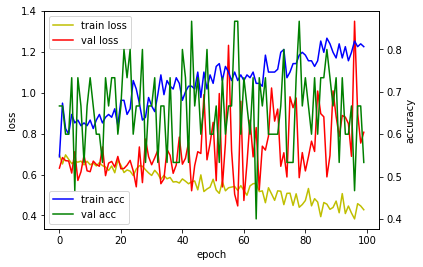

In [26]:
# Multi&Binary5. 학습과정 살펴보기
#%matplotlib inline
#import matplotlib.pyplot as plt

#fig, loss_ax = plt.subplots()

#acc_ax = loss_ax.twinx()

#loss_ax.plot(hist.history['loss'], 'y', label='train loss')
#loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
#loss_ax.set_ylim([0.0, 0.5])

#acc_ax.plot(hist.history['acc'], 'b', label='train acc')
#acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
#acc_ax.set_ylim([0.8, 1.0])

#loss_ax.set_xlabel('epoch')
#loss_ax.set_ylabel('loss')
#acc_ax.set_ylabel('accuray')

#loss_ax.legend(loc='upper left')
#acc_ax.legend(loc='lower left')

#plt.show()

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

(8) 검증모델 테스트하기

In [17]:
print("-- Test --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Test --
{'AD': 0, 'WT': 1}
[[0.367 0.633]
 [0.986 0.014]
 [0.498 0.502]
 [0.546 0.454]
 [0.890 0.110]
 [0.989 0.011]
 [0.986 0.014]
 [0.690 0.310]
 [0.333 0.667]
 [0.271 0.729]
 [0.071 0.929]
 [0.443 0.557]
 [0.998 0.002]
 [0.151 0.849]
 [0.329 0.671]]


(9) 모델 평가하기

In [ ]:
#Multinary, Binary 6. 모델 평가하기
#loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
#print('## evaluation loss and_metrics ##')
#print(loss_and_metrics)

print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

(10) 모델 구조 및 학습된 모델 가중치 저장하기

In [ ]:
model.save('ASAP_weight.h5')
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())


(11) 모델 사용하기

In [ ]:
#Mulyinary 7. 모델 사용하기, 틀린것 만 보이기
#yhat_test = model.predict(x_test, batch_size=32)

#%matplotlib inline
#import matplotlib.pyplot as plt

#plt_row = 5
#plt_col = 5

#plt.rcParams["figure.figsize"] = (10,10)

#f, axarr = plt.subplots(plt_row, plt_col)

#cnt = 0
#i = 0

#while cnt < (plt_row*plt_col):
    
#    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
#        i += 1
#        continue
    
 #   sub_plt = axarr[cnt//plt_row, cnt%plt_col]
 #   sub_plt.axis('off')
 #   sub_plt.imshow(x_test[i].reshape(width, height))
 #   sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
 #   sub_plt.set_title(sub_plt_title)

  #  i += 1    
  #  cnt += 1

#plt.show()

#Binary 7. 모델 사용하기, 홀짝
#yhat_test = model.predict(x_test, batch_size=32)

#%matplotlib inline
#import matplotlib.pyplot as plt

#plt_row = 5
#plt_col = 5

#plt.rcParams["figure.figsize"] = (10,10)

#f, axarr = plt.subplots(plt_row, plt_col)

#for i in range(plt_row*plt_col):
#    sub_plt = axarr[int(i/plt_row), int(i%plt_col)]
#    sub_plt.axis('off')
#    sub_plt.imshow(x_test[i].reshape(width, height))
    
#    sub_plt_title = 'R: '
    
#    if y_test[i] :
#        sub_plt_title += 'odd '
#    else:
#        sub_plt_title += 'even '

#    sub_plt_title += 'P: '
    
#    if yhat_test[i] >= 0.5 :
#        sub_plt_title += 'odd '
#    else:
#        sub_plt_title += 'even '        
    
#    sub_plt.set_title(sub_plt_title)

#plt.show()

# Execution Phase

(1) 사용할 패키지 불러오기

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# import matplotlib.image as mpimg
# from keras.preprocessing.image import ImageDataGenerator

(2) 예측할 데이터 생성하기

In [ ]:
# new_datagen = ImageDataGenerator(rescale = 1./255)

# new_generator = new_datagen.flow_from_directory('rawData/new',
#                                                  target_size = (32,32),
#                                                  batch_size = 3,
#                                                  class_mode = 'categorical')

(3) 저장된 학습 모델 및 가중치 불러오기

In [ ]:
# from keras.models import model_from_json

# Model reconstruction from JSON file
# with open('model_architecture.json', 'r') as f:
#    model = model_from_json(f.read())

# Load weights into the new model
# model.load_weights('ASAP_weight.h5')

(4) 예측하기

In [ ]:
# print("-- Predict --")
# output = model.predict_generator(new_generator, steps=1)
# np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
# print(new_generator.class_indices)
# print(output) # It doesn't matter with the result which folder you put the new data.